# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Prep-Stuff" data-toc-modified-id="Prep-Stuff-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prep Stuff</a></div><div class="lev2 toc-item"><a href="#read-PCs" data-toc-modified-id="read-PCs-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>read PCs</a></div><div class="lev2 toc-item"><a href="#read-template" data-toc-modified-id="read-template-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>read template</a></div><div class="lev2 toc-item"><a href="#plot-PCs-and--templates" data-toc-modified-id="plot-PCs-and--templates-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>plot PCs and  templates</a></div><div class="lev2 toc-item"><a href="#Ib" data-toc-modified-id="Ib-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ib</a></div><div class="lev2 toc-item"><a href="#Ic" data-toc-modified-id="Ic-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Ic</a></div><div class="lev2 toc-item"><a href="#IIb" data-toc-modified-id="IIb-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>IIb</a></div>

In [1]:
from scipy.io.idl import readsav
import pylab as pl
import numpy as np
#%pylab inline
%matplotlib nbagg

# Prep Stuff

## read PCs

In [2]:
eig = np.load("eigen_spec.npy")

## read template

In [3]:
def readtemplate(tp):
    s = readsav('meanspec%s_1specperSN_15.sav'%tp)
    pl.fill_between(s.wlog, s.fmean + s.fsdev, s.fmean - s.fsdev, 
                    color = 'k', alpha = 0.5)
    pl.plot(s.wlog, s.fmean, label="flattened mean %s phase = 15"%tp
            , lw=2)
    pl.ylabel(r"relative flux", fontsize = 18)
    pl.xlabel(r"Rest Wavelength $\AA$", fontsize = 18)
    pl.legend(fontsize = 18)
    pl.show()
    
    return s

## plot PCs and  templates

In [4]:
def plotPCs(s, tp):
    fig = pl.figure(figsize=(5,5))
    for i,e in enumerate(eig):
        pl.plot(np.linspace(4000,7000,len(e)), e +0.5*i, label="PC%i"%i)
        if i:
            pl.fill_between(s.wlog, s.fmean + s.fsdev +0.5*i,
                            s.fmean - s.fsdev +0.5*i, 
                    color = 'k', alpha = 0.3)
        else:
            pl.fill_between(s.wlog, s.fmean + s.fsdev +0.5*i,
                            s.fmean - s.fsdev +0.5*i, 
                    color = 'k', alpha = 0.3, label=tp)
            
    pl.xlim(4000,7000)
    pl.xlabel("wavelength (A)")
    pl.ylabel("relative flux")
    pl.ylim(-0.9, 2.9)
    pl.legend(ncol=3)
    return fig

##  Ib

<IPython.core.display.Javascript object>


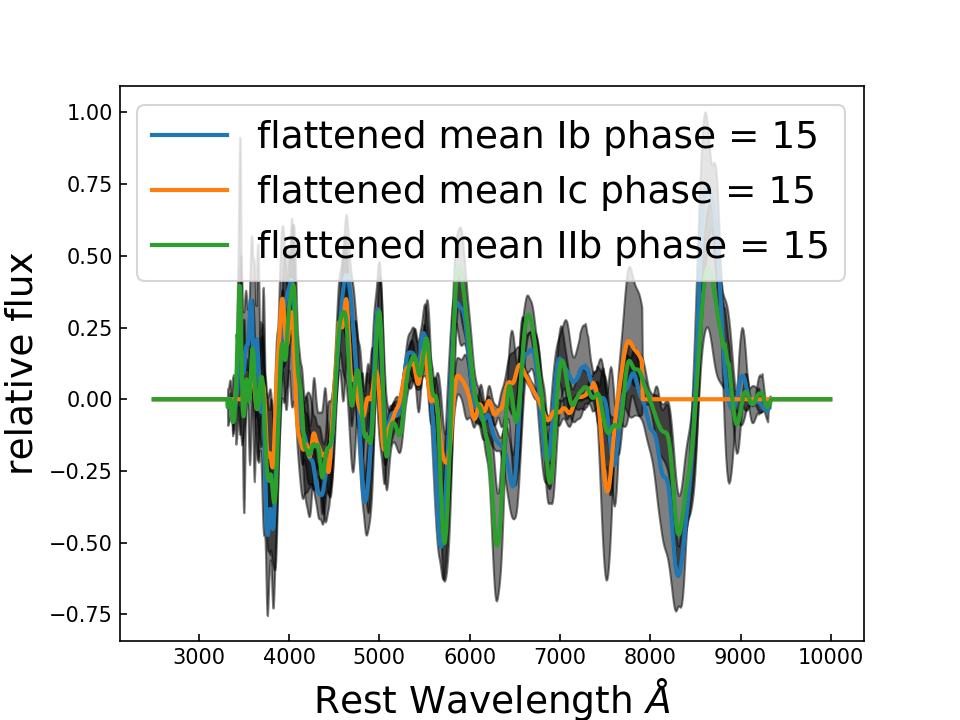

In [5]:
snIb = readtemplate('Ib')
snIc = readtemplate('Ic')
snIIb = readtemplate('IIb')

In [6]:
# Plot templates and PCs

<IPython.core.display.Javascript object>


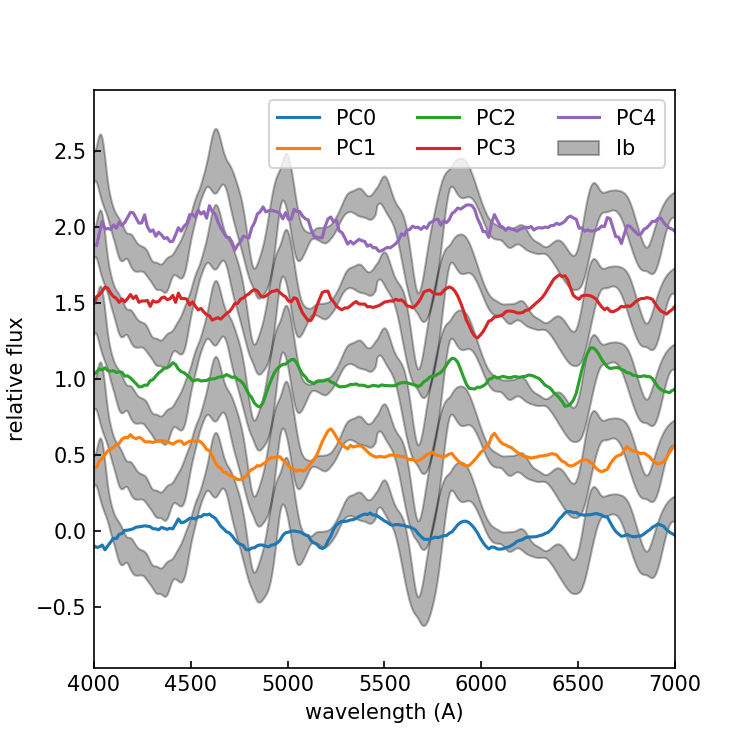

In [7]:
fig = plotPCs(snIb, "Ib");

## Ic

<IPython.core.display.Javascript object>


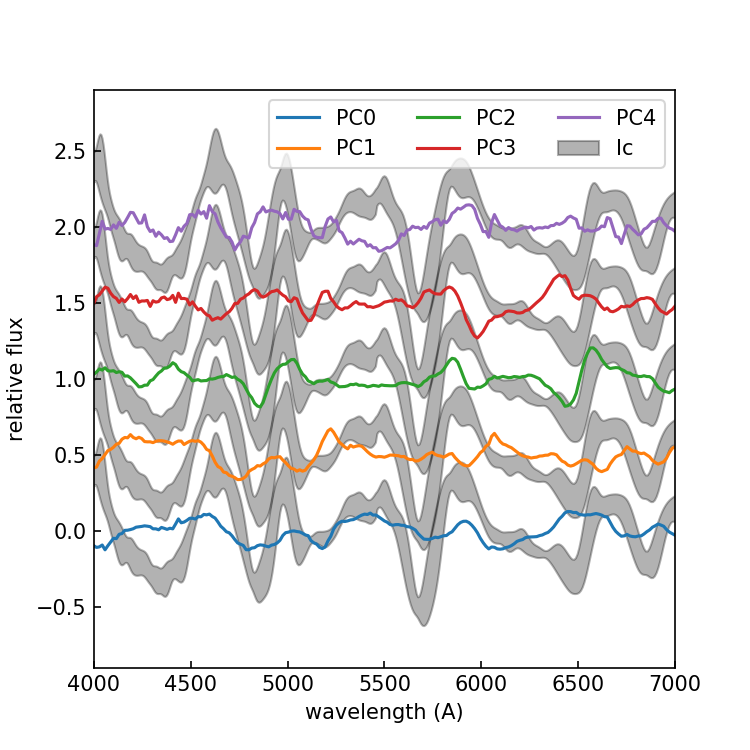

In [8]:
fig = plotPCs(snIb, "Ic");

## IIb

<IPython.core.display.Javascript object>


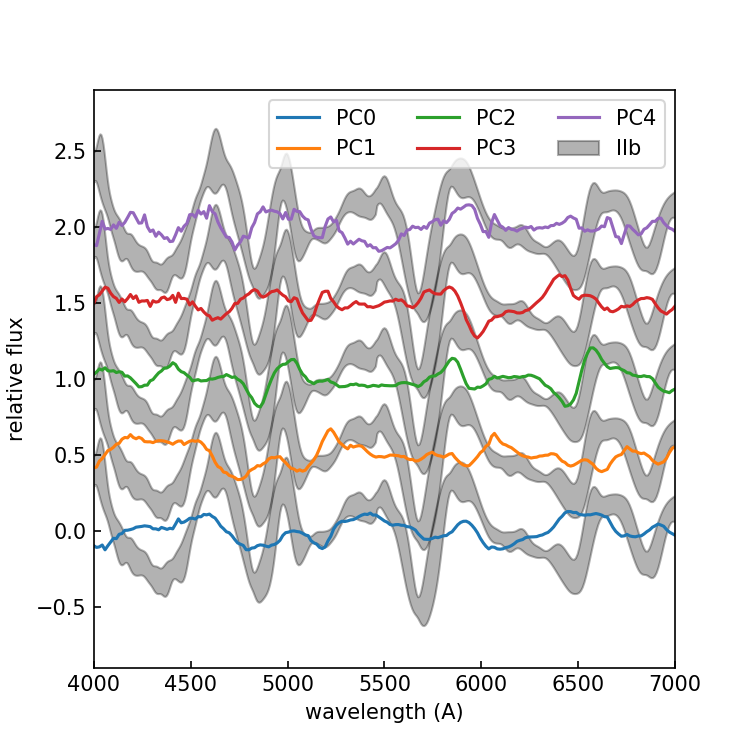

In [9]:
fig = plotPCs(snIb, "IIb");